# Parallelizing Neural Network Training with TensorFlow

In this chapter, we will move on from the mathematical foundations of machine learning and deep learning to introduce TensorFlow. TensorFlow is one of the most popular deep learning libraries currently available, and it can let us implement neural networks much more efficiently than any of our previous NumPy implementations. In this chapter, we will start using TensorFlow and see how it brings significant benefits to training performance. 

This chapter begins the next stage of our journey into training machine learning and deep learning, and we will explore the following topics:

* How TensorFlow improves training performance
* Working with TensorFlow to write optimized machine learning code
* Using TensorFlow high-level APIs to build a multilayer neural network
* Choosing activation functions for artificial neural networks
* Introducing Keras, a high-level wrapper around TensorFlow, for implementing common deep learning architectures most conveniently

# TensorFlow and training performance

TensorFlow can speep up our machine learning tasks significantly. To understand how it can do this, let's begin by discussing some of the performance challenges we typically run into when we run expensive calculations on our hardware. 

The performance of computer processors has, of course, been improving continuously over recent years, and that has allowed us to train more powerful and complex learning systems, and so to improve the predictive performance of our machine learning models. Even the cheapest desktop computer hardware that is available right now comes with processing units that have multiple cores. 

Also, in the previous chapter, we saw that many functions in scikit-learn allowed us to spread those computations over multiple processing units. However, by default, Python is limited to execution on one core due to the **Global Interpreter Lock (GIL)**. So, although we, indeed, take advantage of its multiprocessing library to distribute our computations over multiple cores, we still have to consider that the most advanced desktop hardware rarely comes with more than 8 or 16 such cores. 

If we recall from the previous chapter, where we implemented a very simple multilayer perceptron with only one hidden layer consisting of 100 units, we had to optimize approximately 80,000 weight parameters ([784\*100 + 100] + [100 \* 10] + 10 = 79,510) to learn a model for a very simple image classification task. The images in MNIST are rather small (28 x 28 pixels), and we can only imagine the explosion in the number of parameters if we want to add additional hidden layers or work with images that have higher pixel densities. 

Such a task would quickly become unfeasible for a single processing unit. The question then becomes - how can we tackle such problems more effectively?

The obvious solution to this problem is to use GPUs, which are real work horses. You can think of a graphics card as a small computer cluster inside your machine. Another advantage is that modern GPUs are relatively cheap compared to the state-of-the-art CPUs, as we can see in the following overview:

<img src='images/13_05.png'>

At 70 percent of the price of a modern CPU, we can get a GPU that has 450 times more cores and is capable of around 15 times more floating-point calculations per second. So, what is holding us back from utilizing GPUs for our machine learning tasks?

The challenge is that writing code to target GPU is not as simple as executing Python code in our interpreter. There are special packages, such as CUDA and OpenCL, that allows us to target the GPU. However, writing code in CUDA or OpenCL is probably not the most convenient environment for implementing and running machine learning algorithms. The good news is that this is what TensorFlow was developed for!

# What is TensorFlow?

TensorFlow is a scalable and multiplataform programming interface for implementing and running machine learning algorithms, including convenience wrappers for deep learning. 

TensorFlow was developed by the researchers and engineers of the Google Brain team; and while the main development is led by a team of researchers and software engineers at Google, its development also involves many contributions from the open source community. TensorFlow was initially built for only internal use at Google, but it was subsequently released in November 2015 under a permissive open source license. 

To improve the performance of training machine learning models, TensorFlow allows execution on both CPUs and GPUs. However, its greatest performance capabilities can be discovered when using GPUs. TensorFlow supports CUDA-enabled GPUs officially. Support for OpenCL-enabled devices is still experimental. However, OpenCL will likely be officially supported in near future. 

TensorFlow currently supports frontend interfaces for a number of programming languages. Luckly for us as Python users, TensorFlow's Python API is currently the most complete API, thereby attracting many machine learning and deep learning practitioners. Furthermore, TensorFlow has an official API in C++.

The APIs in other languages, such as Java, Haskell, Node.js, and Go, are not stable yet, but the open source community and TensorFlow developers are constantly improving them. TensorFlow computations rely on constructing a directed graph for representing the data flow. Even though building the graph may sound complicated, TensorFlow comes with high-level APIs that has made it very easy. 

# How we will learn TensorFlow

We will learn first of all about the low-level TensorFlow API. While implementing models at this level can be a little bit cumbersome at first, the advantage of the low-level API is that it gives us more flexibility as programmers to combine the basic operations and develop complex machine learning models. Starting from TensorFlow version 1.1.0, high-level APIs are added on top of the low-level API (for instance, the so-called Layers and Estimators API), which allow building and prototyping models much faster.

After learning about the low-level API, we will move forward to explore two high-level APIs, namely TensorFlow **Layers** and **Keras**. However, let's begin by taking our first steps with TensorFlow low-level API, and ease ourselves into how everything works. 

# First steps with TensorFlow

In this section, we will take our first steps in using the low-level TensorFlow API. Depending on how your system is set up ,you can typically just use Python's *pip* installed and install TensorFlow from PyPI by executing *pip install tensorflow* command from your terminal. 

In case you want to use GPUs, the CUDA toolkit as well as the NVIDIA cuDNN library need to be installed; then you can install TensorFlow with GPU support by executing *pip install tensorflow-gpu*.

TensorFlow is built around a computation graph composed of a set of nodes. Each node represents an operation that may have zero or more input or output. The values that flow through the edges of the computation graph are called **tensors**. 

Tensors can be understood as a generalization of scalars, vectors, matrices, and so on. More concretely, a scalar can be defined as a rank-0 tensor, a vector as a rank-1 tensor, a matrix as a rank-2 tensor, and matrices stacked in a third dimension as rank-3 tensors. 

Once a computation graph is built, the graph can be launched in a TensorFlow *Session* for executing different nodes of the graph. In a next chapter, we will cover the steps in building the computation graph and launching the graph in a session in more detail. 

As a warm-up exercise, we will start with the use of simple scalars from TensorFlow to compute a net input $z$ of a sample point $x$ in a one-dimensional dataset with weight $w$ and bias $b$:

$z = w \times x + b$

The following code shows the implementation of this equation in the low-level TensorFlow API:

In [1]:
import tensorflow as tf

## create a graph
g = tf.Graph()

with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(None), 
                       name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    
    z = w*x + b
    
    init = tf.global_variables_initializer()
    
## create a session and pass in graph g
with tf.Session(graph=g) as sess:
    ## initialize w anb b:
    sess.run(init)
    ## evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'
              % (t, sess.run(z, feed_dict={x:t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


This was pretty straightforward, right? In general, when we develop for a model in the TensorFlow low-level API, we need to define placeholders for input data ($x$, $y$, and sometimes other tunable parameters); then, define the weight matrices and build the model from input to output. If this is an optimization problem, we should define the loss or cost function and determine which optimization algorithm to use. TensorFlow will create a graph that contains all the symbols that we have defined as nodes in this graph. 

Here, we created a placeholder for $x$ with *shape=(None)*. This allows us to feed the values in an element-by-element form and as a batch of input data at once, as follows:

In [2]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict={x: [1., 2., 3.]}))

[2.7 4.7 6.7]


# Working with array structures

Let's discuss how to use array structures in TensorFlow. By executing the following code, we will create a simple rank-3 tensor of size $\text{batchsize} \times 2 \times 3$, reshape it, and calculate the column sums using TensorFlow's optimized expressions. Since we do not know the batch size a priori, we specify *None* for the batch size in the argument of the *shape* parameter of the placeholder $x$:

In [3]:
import tensorflow as tf
import numpy as np

g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, 
                       shape=(None, 2, 3), 
                       name='input_x')
    
    x2 = tf.reshape(x, shape=(-1, 6), name='x2')
    
    ## calculate the sum of each column
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    
    ## calculate the mean of each column
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')
    
with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    
    print('input shape: ', x_array.shape)
    print('Reshaped:\n', 
          sess.run(x2, feed_dict={x: x_array}))
    print('Column Sums:\n', 
          sess.run(xsum, feed_dict={x: x_array}))
    print('Column Means:\n', 
          sess.run(xmean, feed_dict={x: x_array}))

input shape:  (3, 2, 3)
Reshaped:
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:
 [18. 21. 24. 27. 30. 33.]
Column Means:
 [ 6.  7.  8.  9. 10. 11.]


In this example, we worked with three functions - *tf.reshape*, *tf.reduce_sum*, and *tf.reduce_mean*. Note that for reshaping, we used the value $-1$ for the first dimension. This is because we do not know the value of the batch size; when reshaping a tensor, if you use $-1$ for a specific dimension, the size of that dimension will be computed according to the total size of the tensor and the remaining dimension. Therefore, *tf.reshape(tensor, shape=(-1,))* can be used to flatten a tensor. 

# Developing a simple model with the low-level TensorFlow API

Now that we have familiarized ourselves with TensorFlow, let's take a look at a really practical example and implement **Ordinary Least Squares (OLS)** regression. 

Let's start by creating a small one-dimensional toy dataset with 10 training samples:

In [4]:
import tensorflow as tf
import numpy as np

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 
                    6.3, 6.6, 7.4, 8.0, 9.0])

Given this dataset, we want to train a linear regression model to predict the ouput $y$ from the input $x$. Let's implement this model in a class, which we name *TfLinreg*. For this, we would need two placeholders - one for the input $x$ and one for $y$ for feeding the data into our model. Next, we need to define the trainable variables - weights $w$ and bias $b$. 

Then, we can define the linear regression model as $z = w \times x + b$, followed by defining the cost function to be the **Mean of Squared Error (MSE)**. To learn the weight parameters of the model, we use the gradient descent optimizer. The code is as follows: 

In [5]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01, 
                 random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        ## build the model
        with self.g.as_default():
            ## set graph-level random-seed
            tf.set_random_seed(random_seed)
            
            self.build()
            
            ## create initializer
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32, 
                                shape=(None, self.x_dim), 
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, 
                                shape=(None), 
                                name='y_input')
        print(self.X)
        print(self.y)
        
        ## define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)), 
                        name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), 
                        name='bias')
        print(w)
        print(b)
        
        self.z_net = tf.squeeze(w*self.X + b, name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, 
                               name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors, 
                                        name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(
                        learning_rate=self.learning_rate, 
                        name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

So far, we have defined a class to construct our model. We will create an instance of this class and call it *lrmodel*, as follows:

In [6]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


The *print* statements that we wrote in the *build* method will display information about six nodes in the graph - $X$, $y$, $w$, $b$, $z\_net$, and $sqr\_errors$ - with their names and shapes. 

The next step is to implement a training function to learn the weights of the linear regression model. Note that $b$ is the bias unit (the $y$-axis intercept at $x=0$). 

For training, we implement a separate function that need a TensorFlow session, a model instance, training data, and the number of epochs as input arguments. In this function, first we initialize the variables in the TensorFlow session using the *init_op* operation defined in the mode. Then, we iterate and call the *optimizer* operation of the model while feeding the training data. This function will return a list of training costs as a side product:

In [7]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    ## initialize all variables: W and b
    sess.run(model.init_op)
    
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], 
                           feed_dict={model.X: X_train, 
                                      model.y: y_train})
        training_costs.append(cost)
    
    return training_costs

So, now we can create a new TensorFlow session to launch the *lrmodel.g* graph and pass all the required arguments to the *train_linreg* function for training:

In [8]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

Let's visualize the training costs these 10 epochs to see whether the model is converged or not:

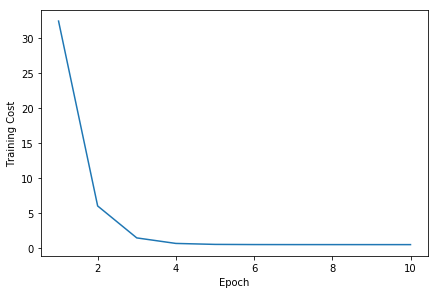

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

As we can see in the following plot, this simple model converges very quickly after a few epochs. 

So far so good. Looking at the cost function, it seems that we built a working regression model from this particular dataset. Now, let's compile a new function to make predictions based on the input features. For this function, we need the TensorFlow session, the model, and the test dataset:

In [10]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, 
                      feed_dict={model.X: X_test})
    return y_pred

Implementing a predict function was pretty straightforward; just running *z_net* defined in the graph computes the predicted output values. Next, let's plot the linear regression fit on the training data:

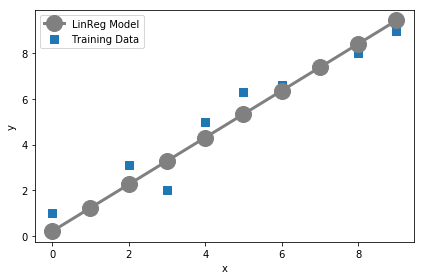

In [11]:
plt.scatter(X_train, y_train, marker='s', s=50, 
            label='Training Data')
plt.plot(range(X_train.shape[0]), 
         predict_linreg(sess, lrmodel, X_train), 
         color='gray', marker='o', markersize=16, 
         linewidth=3, label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

As we can see in the resulting plot, our model fits the training data points appropriately. 

# Training neural networks efficiently with high-level TensorFlow APIs

In this section, we will take a look at two high-level TensorFlow APIs - the Layers API (*tensorflow.layers* or *tf.layers*) and the Keras API (*tensorflow.contrib.keras*). Keras can be installed as a separate package. It supports Theano or TensorFlow as backend. 

However, after the release of TensorFlow 1.1.0, Keras has been added to the TensorFlow *contrib* submodule. It is very likely that the Keras subpackage will be moved outside the experimental *contrib* submodule and become one of the main TensorFlow submodules soon. 

## Building multilayer neural networks using TensorFlow's Layers API

To see what neural network training via the *tensorflow.layers (tf.layers)* high-level API looks like, let's implement a multilayer perceptron to classify the handwritten digits from the MNIST dataset, which we introduced in the previous chapter. 

Note that TensorFlow also provides the same dataset as follows: 

*import tensorflow as tf*
*from tf.examples.tutorials.mnist import input_data*

However, we work with the MNIST dataset as an external dataset to learn all the steps of data preprocessing separately. This way, you would learn what you need to do with your own dataset. 

After downloading and unzipping the archives, we place the files in the *mnist* directory in our current working directory so that we can load the training as well as the test dataset, using the *load_mnist(path, kind)* function we implemented before:

In [12]:
import os 
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    
    return images, labels

In [13]:
## loading the data
X_train, y_train = load_mnist('./mnist/', kind='train')
print('Rows: %d, Columns: %d' % (X_train.shape[0], 
                                 X_train.shape[1]))
X_test, y_test = load_mnist('./mnist/', kind='t10k')
print('Rows: %d, Columns: %d' % (X_test.shape[0], 
                                 X_test.shape[1]))
## mean centering and normalization:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

del X_train, X_test

print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

Rows: 60000, Columns: 784
Rows: 10000, Columns: 784
(60000, 784) (60000,)
(10000, 784) (10000,)


Now we can start building our model. We will start by creating two placeholders, named *tf_x* and *tf_y*, and then build a multilayer perceptron as done before, but with three fully connected layers. 

However, we will replace the logistic units in the hidden layers with hyperbolic tangent activation functions (*tanh*), replace the logistic function in the output layer with *softmax*, and add an additional hidden layer. 

The *tanh* and *softmax* functions are new activation functions. We will learn more about these activation functions in the next section: *Choosing activation functions for multilayer neural networks*.

In [15]:
import tensorflow as tf

n_features = X_train_centered.shape[1]
n_classes = 10
random_seed = 123
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32, 
                          shape=(None, n_features), 
                          name='tf_x')
    tf_y = tf.placeholder(dtype=tf.int32, 
                          shape=None, 
                          name='tf_y')
    y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
    
    h1 = tf.layers.dense(inputs=tf_x, units=50, 
                         activation=tf.tanh, 
                         name='layer1')
    
    h2 = tf.layers.dense(inputs=h1, units=50, 
                         activation=tf.tanh, 
                         name='layer2')
    
    logits = tf.layers.dense(inputs=h2, units=10, 
                             activation=None, 
                             name='layer3')
    
    predictions = {
        'classes': tf.argmax(logits, axis=1, 
                             name='predicted_classes'), 
        'probabilities': tf.nn.softmax(logits, 
                                       name='softmax_tensor')
    }

Next, we define the cost functions and add an operator for initializing the model variables as well as an optimization operator:

In [16]:
## define cost function and optimizer
with g.as_default():
    cost = tf.losses.softmax_cross_entropy(onehot_labels=y_onehot, 
                                           logits=logits)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    
    train_op = optimizer.minimize(loss=cost)
    
    init_op = tf.global_variables_initializer()

Before we start training the network, we need a way to generate batches of data. For this, we implement the following function that returns a generator:

In [19]:
def create_batch_generator(X, y, batch_size=128, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    
    if shuffle:
        data = np.column_stack((X_copy, y_copy))
        np.random.shuffle(data)
        X_copy = data[:, :-1]
        y_copy = data[:, -1].astype(int)
        
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])

Next, we can create a new TensorFlow session, initialize all the variables in our network, and train it. We also display the average training los after each epoch to monitors the learning process later:

In [20]:
## create a session to launch the graph
sess = tf.Session(graph=g)
## run the variable initialization operator
sess.run(init_op)

## 50 epochs of training:
for epoch in range(50):
    training_costs = []
    batch_generator = create_batch_generator(X_train_centered, 
                                             y_train, 
                                             batch_size=64, 
                                             shuffle=True)
    for batch_X, batch_y in batch_generator:
        ## prepare a dict to feed data to our network:
        feed = {tf_x: batch_X, tf_y: batch_y}
        _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
        training_costs.append(batch_cost)
    print(' -- Epoch %2d  '
          'Avg. Training Loss: %.4f' % (epoch+1, np.mean(training_costs)))

 -- Epoch  1  Avg. Training Loss: 1.5380
 -- Epoch  2  Avg. Training Loss: 0.9406
 -- Epoch  3  Avg. Training Loss: 0.7420
 -- Epoch  4  Avg. Training Loss: 0.6328
 -- Epoch  5  Avg. Training Loss: 0.5622
 -- Epoch  6  Avg. Training Loss: 0.5129
 -- Epoch  7  Avg. Training Loss: 0.4761
 -- Epoch  8  Avg. Training Loss: 0.4476
 -- Epoch  9  Avg. Training Loss: 0.4250
 -- Epoch 10  Avg. Training Loss: 0.4060
 -- Epoch 11  Avg. Training Loss: 0.3902
 -- Epoch 12  Avg. Training Loss: 0.3765
 -- Epoch 13  Avg. Training Loss: 0.3646
 -- Epoch 14  Avg. Training Loss: 0.3539
 -- Epoch 15  Avg. Training Loss: 0.3445
 -- Epoch 16  Avg. Training Loss: 0.3361
 -- Epoch 17  Avg. Training Loss: 0.3282
 -- Epoch 18  Avg. Training Loss: 0.3210
 -- Epoch 19  Avg. Training Loss: 0.3145
 -- Epoch 20  Avg. Training Loss: 0.3084
 -- Epoch 21  Avg. Training Loss: 0.3028
 -- Epoch 22  Avg. Training Loss: 0.2973
 -- Epoch 23  Avg. Training Loss: 0.2923
 -- Epoch 24  Avg. Training Loss: 0.2876
 -- Epoch 25  Av

The training process may take a couple of minutes. Finally, we can use the trained model to do predictions on the test dataset: 

In [21]:
## do prediction on the test set:
feed = {tf_x: X_test_centered}
y_pred = sess.run(predictions['classes'], feed_dict=feed)
print('Test Accuracy: %.2f%%' 
       % (100*np.sum(y_pred==y_test)/y_test.shape[0]))

Test Accuracy: 93.53%


We can see that by leveraging high-level APIs, we can quickly build a model and test it. Therefore, a high-level API is very useful for prototyping our ideas and quickly checking the results. 

Next, we will develop a similar classification model for MNIST using Keras, which is another high-level TensorFlow API. 

## Developing a multilayer neural network with Keras

The development of Keras started in the early months of 2015. As of today, it has evolved into one of the most popular and widely used libraries that is built on top of Theano and TensorFlow. 

Similar to TensorFlow, the Keras allows us to utilize our GPUs to accelerate neural network training. One of its prominent features is that it has a very intuitive and use-friendly API, which allows us to implement neural networks in only a few lines of code. 

Keras was first released as a standalone API that could leverage Theano as a backend, and the support for TensorFlow was added later. Keras is also integrated into TensorFlow from version 1.1.0. Therefore, if you have TensorFlow version 1.1.0, no more installation is needed for Keras. 

Currently, Keras is part of the *contrib* module (which contains packages developed by contributors to TensorFlow and is considered experimental code). In future releases of TensorFlow, it may be moved to become a separate module in the TensorFlow main API. 

Note that you may have to change the code from *import tensorflow.contrib.keras as keras* to *import tensorflow.keras as keras* in future versions of TensorFlow in the following code examples. 

On the following pages, we will walk through the code examples for using Keras step by step. Using the same functions described in the previous section, we need to load the data as follows:

In [22]:
## loading the data
X_train, y_train = load_mnist('./mnist/', kind='train')
print('Rows: %d, Columns: %d' % (X_train.shape[0], 
                                 X_train.shape[1]))
X_test, y_test = load_mnist('./mnist/', kind='t10k')
print('Rows: %d, Columns: %d' % (X_test.shape[0], 
                                 X_test.shape[1]))
## mean centering and normalization:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

del X_train, X_test

print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

Rows: 60000, Columns: 784
Rows: 10000, Columns: 784
(60000, 784) (60000,)
(10000, 784) (10000,)


First, let's set the random seed for NumPy as TensorFlow so that we get consistent results:

In [25]:
import tensorflow as tf
import tensorflow.contrib.keras as keras

np.random.seed(123)
tf.set_random_seed(123)

To continue with the preparation of the training data, we need to convert the class labels (integers 0-9) into the one-hot format. Fortunately, Keras provides a convenient tool for this:

In [26]:
y_train_onehot = keras.utils.to_categorical(y_train)
print('First 3 labels: ', y_train[:3])
print('\nFirst 3 labels (one-hot):\n', y_train_onehot[:3])

First 3 labels:  [5 0 4]

First 3 labels (one-hot):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now, we can get to the interesting part and implement a neural network. Briefly, we will have three layers, where the first two layers each have 50 hidden units with the *tanh* activation functions and the last layer has 10 layers for the 10 class labels and uses *softmax* to give the probability of each class. Keras makes these tasks very simple, as you can see in the following code implementation: 

In [27]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=50, 
                             input_dim=X_train_centered.shape[1], 
                             kernel_initializer='glorot_uniform', 
                             bias_initializer='zeros', 
                             activation='tanh'))

model.add(keras.layers.Dense(units=50, 
                             input_dim=50, 
                             kernel_initializer='glorot_uniform', 
                             bias_initializer='zeros', 
                             activation='tanh'))

model.add(keras.layers.Dense(units=y_train_onehot.shape[1], 
                             input_dim=50, 
                             kernel_initializer='glorot_uniform', 
                             bias_initializer='zeros', 
                             activation='softmax'))

sgd_optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-7, 
                                     momentum=0.9)

model.compile(optimizer=sgd_optimizer, 
              loss='categorical_crossentropy')

First, we initialize a new model using the *Sequential* class to implement a feedforward neural network. Then, we can add as many layers to it as we like. However, since the first layer that we add is the input layer, we have to make sure that the *input_dim* attribute matches the number of features (columns) in the training (784 features or pixels in the neural network implementation). 

Also, we have to make sure that the number of output units (*units*) and input units (*input_dim*) of two consecutive layers match. In the preceding example, we added two hidden layers with 50 hidden units plus one bias unit each. The number of units in the output layer should be equal to the number of unique class labels - the number of columns in the one-hot-encoded class label array. 

Note that we used a new initialization algorithm for weight matrices by setting *kernel_initializer='glorot_uniform'*. Glorot initialization (also known as Xavier initialization) is a more robust way of initialization for deep neural networks. The biases are initialized to zero, which is more common, and in fact the default in Keras. 

Before we can compile our model, we also have to define an optimizer. In the preceding example, we chose a stochastic gradient descent optimization, which we are already familiar with from previous chapters. Furthermore, we can set values for the weight decay constant and momentum learning to adjust the learning rate at each epoch. Lastly, we set the cost (or loss) function to *categorial_crossentropy*. 

The binary cross-entropy is just a technical term of the cost function in the logistic regression, and the categorical cross-entropy is its generalization for multiclass predictions via softmax, which we will cover in the section *Estimating class probabilities in multiclass classification via the softmax function* later in this chapter. 

After compiling the model, we can now train it by calling the *fit* method. Here, we are using mini-batch stochastic gradient with a batch size of 64 training samples per batch. We train the MLP over 50 epochs, and we can follow the optimization of the cost function during training by setting *verbose=1*.

The *validation_split* parameter is especially handy since it will reserve 10 percent of the training data (here, 6,000 samples) for validation after each epoch so that we can monitor whether the model is overfitting during training:

In [28]:
history = model.fit(X_train_centered, y_train_onehot, 
                    batch_size=64, epochs=50, verbose=1, 
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 38us/step - loss: 0.7528 - val_loss: 0.3674
Epoch 2/50
54000/54000 [==============================] - 2s 33us/step - loss: 0.3765 - val_loss: 0.2757
Epoch 3/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.3068 - val_loss: 0.2353
Epoch 4/50
54000/54000 [==============================] - 2s 33us/step - loss: 0.2681 - val_loss: 0.2105
Epoch 5/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.2416 - val_loss: 0.1924
Epoch 6/50
54000/54000 [==============================] - 2s 33us/step - loss: 0.2215 - val_loss: 0.1796
Epoch 7/50
54000/54000 [==============================] - 2s 33us/step - loss: 0.2052 - val_loss: 0.1690
Epoch 8/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.1917 - val_loss: 0.1602
Epoch 9/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.1798 - val_loss: 0.1533
Epoch 

Printing the value of the cost function is extremely useful during training. This is because we can quickly spot whether the cost is decreasing during training and stop the algorithm earlier, if otherwise, to tune the hyperparameters values. 

To predict the class labels, we can then use the *predict_classes* method to return the class labels directly as integers: 

In [29]:
y_train_pred = model.predict_classes(X_train_centered, 
                                     verbose=0)
print('First 3 predictions: ', y_train_pred[:3])

First 3 predictions:  [5 0 4]


Finally, let's print the model accuracy on training and test sets: 

In [30]:
y_train_pred = model.predict_classes(X_train_centered, 
                                     verbose=0)
correct_preds = np.sum(y_train==y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('Training accuracy: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test_centered, 
                                    verbose=0)
correct_preds = np.sum(y_test==y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

Training accuracy: 99.03%
Test accuracy: 96.55%


Note that this is just a very simple neural network without optimized tuning parameters. If you are interested in playing more with Keras, feel free to further tweak the learning rate, momentum, weight decay, and number of hidden units. 

# Choosing activation functions for multilayer networks

For simplicity, we have only discussed the sigmoid activation function in the context of multilayer feedforward neural network so far; we used it in the hidden layer as well as the output layer in the multilayer implementation in the previous chapter. 

Although we referred to this activation function as a sigmoid function - as it is commonly called in literature - the more precise definition would be a *logistic function* or *negative log-likelihood function*. In the following subsections, you will learn more about alternative sigmoidal functions that are useful for implementing multilayer neural networks. 

Technically, we can use any function as an activation function in multilayer neural network as long as it is differenciable. We can even use linear activation functions, such as Adaline. However, in practice, it would not be very useful to use linear activation functions for both hidden and output layer since we want to introduce nonlinearity in a typical artificial neural network to be able to tackle complex problems. The sum of linear functions yields a linear function after all. 

The logistic activation function that we used in previous chapter, probably mimics the concept of a neuron in a brain most closely - we can think of it as the probability of whether a neuron fires or not. 

However, logistic activation functions can be problematic if we have highly negative input since the ouput of the sigmoid would be close to zero in this case. If the sigmoid function returns output that are close to zero, the neural network would learn very slowly and it becomes more likely that it gets trapped in the local minima during training. This is why people often prefer a hyperbolic tangent as an activation function in hidden layers. 

Before we discuss what a hyperbolic tangent looks like, let's briefly recapitulate some of the basics of the logistic function and look at a generalization that makes it more useful for multilabel classification problems. 

## Logistic function recap

As we mentioned in the introduct of this section, the logistic function, often just called the sigmoid function, is in fact a special case of a sigmoid function. Recall from the section on logistic regression that we can use a logistic function to model the probability that sample $x$ belongs to the positive class (class 1) in a binary classification task. The given net input $z$ is shown in the following equation:

$$z = w_0x_0 + w_1x_1 + \ldots + w_mx_m = \sum_{i=0}^m w_ix_i = w^Tx$$

The logistic function will compute the following:

$\phi_{logistic}(z) = \frac{1}{1 + e^{-z}}$

Note that $w_0$ is the bias unit ($y$-axis intercept, which means $x_0 = 1$). To provide a more concrete example, let's assume a model for a two-dimensional data point $x$ and a model with the following weight coefficients assigned to thw $w$ vector:

In [31]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


If we calculate the net input and use it to activate a logistic neuron with those particular feature values and weight coefficients, we get a value of 0.888, which we can interpret as 88.8 percent probability that this particular sample $x$ belongs to the positive class. 

In previous chapter, we used the one-hot-encoding technique to compute the values in the output layer consisting of multiple logistic activation units. However, as we will demonstrate with the following code example, an output layer consisting of multiple logistic activation units does not produce meaningful, interpretable probabilities values:

In [32]:
# W: array with shape = (n_output_units, n_hidden_units+1)
#    note that the first column are the bias units
W = np.array([[1.1, 1.2, 0.8, 0.4], 
              [0.2, 0.4, 1.0, 0.2], 
              [0.6, 1.5, 1.2, 0.7]])
# A: data array with shape = (n_hidden_units+1, n_samples)
#    note that the first column of this array must be 1
A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)
print('Output Units: \n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units: 
 [0.85569687 0.68135373 0.83889105]


As we can see in the output, the resulting values cannot be interpreted as probabilities for a three-class problem. The reason of this is that they do not sum up to 1. However, this is in fact not a big concern if we only use our model to predict the class labels, not the class membership probabilities. One way to predict the class label from the output units obtained earlier is to use the maximum value:

In [33]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


In certain contexts, it can be useful to compute meaningful class probabilities for multiclass predictions. In the next section, we will take a look at a generalization of the logistic function, the *softmax* function, which can help us with this task.

## Estimating class probabilities in multiclass classification via the softmax function

In the previous section, we saw how could obtain a class label using the *argmax* function. The *softmax* function is in fact a soft form of the *argmax* function; instead of given a single class index, it provides the probability of each class. Therefore, it allows us to compute meaningful class probabilities in multiclass settings (multinomial logistic regression). 

In *softmax*, the probability of a particular sample with net input $z$ belonging to the $i$th class can be computed with a normalization term in the denominator, that is, the sum of all $M$ linear functions:

$$p(y=i|z) = \phi(z) = \frac{e^{z_j}}{\sum_{i=1}^M e^{z_j}}$$

To see *softmax* in action, let's code it up in Python:

In [34]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)
np.sum(y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


1.0

As we can see, the predicted class probabilities now sum up to 1, as we would expect. It is also notable that the predicted class label is the same as when we applied the *argmax* function to the logistic output. Intuitively, it may help to think of the *softmax* function as a *normalized* ouput that is useful to obtain meaningful class-membership predictions in multiclass settings. 

## Broadening the output spectrum using hyperbolic tangent

Another sigmoid function that is often used in the hidden layers of artificial networks in the **hyperbolic tangent** (commonly known as **tanh**), which can be interpreted as a rescaled version of the logistic function: 

$$\phi_{logistic}(z) = \frac{1}{1 + e^{-z}}$$

$$\phi_{tanh}(z) = 2 \times \phi_{logistic}(2z)-1 = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

The advantage of the hyperbolic tangent over the logistic function is that it has a broader output spectrum and ranges in the open interval (-1, 1), which can improve the convergence of the back propagation algorithm.

In contrast, the logistic function returns an output signal that ranges in the open interval (0, 1). For an intuitive comparison of the logistic function and the hyperbolic tangent, let's plot the two sigmoid functions:

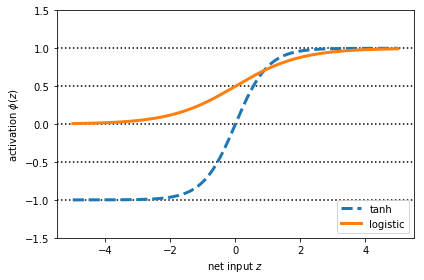

In [37]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', 
         label='tanh')
plt.plot(z, log_act, linewidth=3, label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

As we can see, the shapes of the two sigmoidal curves look very similar; however, the *tanh* function has $2\times$ larger output space than the *logistic* function. 

Note that we implemented the *logistic* and *tanh* functions verbosely for the purpose of illustration. In practice, we can use NumPy's *tanh* function to achive the same results:

In [38]:
tanh_act = np.tanh(z)
print(tanh_act)

[-0.9999092  -0.99990829 -0.99990737 ...  0.99990644  0.99990737
  0.99990829]


In addition, the logistic function is available in SciPy's special module:

In [39]:
from scipy.special import expit
log_act = expit(z)
print(log_act)

[0.00669285 0.00672617 0.00675966 ... 0.99320669 0.99324034 0.99327383]


## Rectified linear unit activation

**Rectified Linear Unit (ReLU)** is another activation function that is often used in deep neural networks. Before we understand ReLU, we should step back and understand the vanishing gradient problem of tanh and logistic activations. 

To understand this problem, let's assume that we initially have the net input $z_1 = 20$, which changes to $z_2 = 25$. Computing the tanh activation, we get $\phi(z_1) \approx 1.0$ and $\phi(z_2) \approx 1.0$, which shows no change in the output. 

This means the derivative of activations with respect to net input diminishes as $z$ becomes large. As a result, learning weights during the training phase become very slow because the gradient terms may be very close to zero. ReLU activation addresses this issue. Mathematically, ReLU is defined as follows:

$$\phi(z) = max(0, z)$$

ReLU is still a nonlinear function that is good for learning complex functions with neural networks. Besides this, the derivative of ReLU, with respect to its input, is always 1 for positive input values. Therefore, it solves the problem of vanishing gradients, making it suitable for deep neural networks. We will use the ReLU activation function in the next chapter as an activation function for multilayer convolutional neural networks. 

Now that we know more about the different activation functions that are commonly used in artificial neural networks, let's conclude this section with an overview of the different activation functions that we encountered in this book: 

<img src='images/13_04.png'>

# Summary

In this chapter, you learned how to use TensorFlow, an open source library for numerical computations with a special focus on deep learning. While TensorFlow is more convenient to use compared to NumPy, due to its additional complexity to support GPUs, it allows us to define and train large, multilayer neural networks very efficiently. 

Also, you learned about the TensorFlow API to build complex machine learning and neural network models and run them efficiently. First, we explored programming in the low-level TensorFlow API. Implementing model at this level may be tedious when we have to program at the level of matrix-vector multiplications and define every detail of each operation. However, the advantage is that this allows us as developers to combine such basic operations and build more complex models. Furthermore, we discussed how TensorFlow allows us to utilize the GPUs for training and testing big neural networks to speed up the computations. Without the use of GPUs, training some networks would typically need months of computation. 

We then explored two high-level APIs that make building neural network models a lot easier compared to the low-level API. Specifically, we used TensorFlow Layers and Keras to build the multilayer neural network and learned how to build models using those APIs. 

Finally, you learned about different activation functions and understood their behaviors and applications. Specifically, in this chapter, we saw tanh, softmax, and ReLU. In previous chapter, we started with implementing a simple **Multilayer Perceptron (MLP)** to classify a handwritten image in the MNIST dataset. While the low-level implementation from scratch was helpful to illustrate the core concepts of a multilayer neural network, such as the forward pass and backpropagation, training neural networks using NumPy is very inefficient and impractical for large networks. 

In the next chapter, we wil continue our journey and dive deeper into TensorFlow, and we will find ourselves working with graph and session objects. Along the way, we will learn many new concepts, such as placeholders, variables, and saving and restoring models in TensorFlow. 